# Machine Learning: Recognizing hand-written digits

An example showing how Scikit-learn can be used to recognize images of hand-written digits in Python 3

**Author**: Samuel Yanez

** Importing required libraries and datasets **

Scikit-learn is a free machine learning library for Python that we will be using in our example. Scikit-learn comes with a few standard datasets including the digits dataset that we need.

In [40]:
# Imports Pyplot
import matplotlib.pyplot as plt

# Includes Pyplot plots inline
%matplotlib inline

# Import datasets and classifier
from sklearn import datasets, svm

# Loads the digits dataset
digits = datasets.load_digits()

# Prints the number of images in the dataset
len(digits.images)

1797

** Looking into the digits dataset **

Our dataset is a dictionary-like object that holds all the data and some metadata. This data is stored in the `.data` member, which is a `n_samples`, `n_features` array. The datasets also contains a `.images` member which contains the same as `.data` but in a way that can be easily converted into an image.

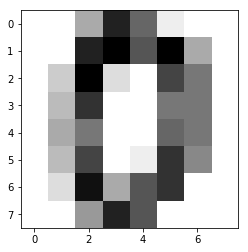

In [41]:
# Uses the pyplot image show function to display the first image
plt.imshow(digits.images[0], plt.cm.gray_r)

In [42]:
# Each element represents the pixel of our greyscale image. The value ranges from 0 to 255 for an 8 bit pixel
print(digits.images[0])

print("\n" + str(digits.data[0]))

# The digits dataset also contains data on the target values for our data, 
# that is the number corresponding to each digit image that we are trying to learn
print("\n Target value: " + str(digits.target[0]))

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]

 Target value: 0


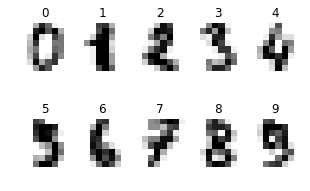

In [43]:
# Creates a pyplot showing the first 10 images and targets from our data
images_and_targets = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_targets[:10]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

** Learning and predicting from the data **

In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In [44]:
# Creates a Support Vector Classifier
classifier = svm.SVC(gamma=0.001)

# Sets the classifier to learn from all but the last 10 digits
classifier.fit(digits.data[:-10], digits.target[:-10])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now, we can ask to the classifier what are the digits for our last 10 images, which we have not used to train the classifier.

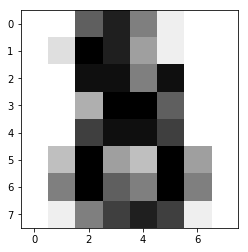

In [45]:
# Displays the last digit in the dataset
plt.imshow(digits.images[1796], plt.cm.gray_r)

In [46]:
# Predicts the target from the last digit in the dataset using the classifier prediciton model
print("prediction: " +  str(classifier.predict(digits.data[-1:])[0]))

prediction: 8


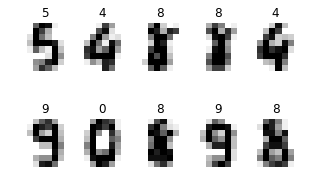

In [47]:
# Creates a pyplot showing the last 10 images and predicted values for them
images = digits.images[-10:]
predicted = classifier.predict(digits.data[-10:])

images_and_predictions = list(zip(images, predicted))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_predictions[:10]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)